In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import zscore

In [ ]:
cp = pd.read_excel("cp_data_schoon.xlsx")

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbb8e3f03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbb8e3f0790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbb8e3f0100>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbb8e3f0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbb8e3f0f70>],
 'means': []}

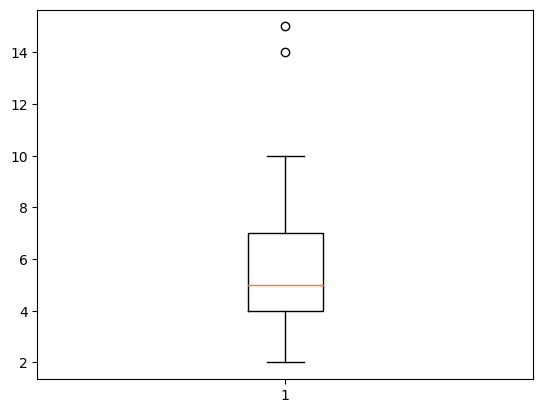

In [ ]:
#cp = cp[cp['uschermtijd'] < 12 ]
plt.boxplot(cp['uschermtijd'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7dbb8e2d8640>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbb8e2d8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbb8e2d8340>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbb8e2d90c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbb8e2d9360>],
 'means': []}

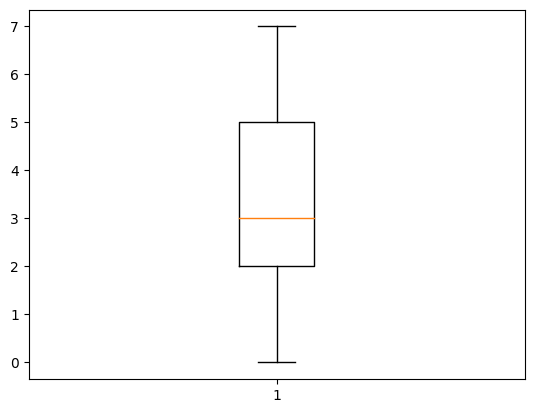

In [ ]:
#outliers weghalen
cp = cp[cp['umedia'] < 8 ]
plt.boxplot(cp["umedia"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7dbb53620550>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbb53620a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbb536202b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbb53620fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbb53621270>],
 'means': []}

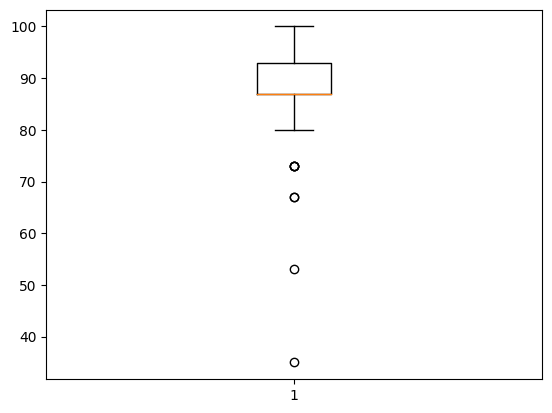

In [ ]:
#outliers weghalen

plt.boxplot(cp["mrpercentage"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7dbb53694550>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbb8dbf4d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbb536942b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbb53694910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbb53694bb0>],
 'means': []}

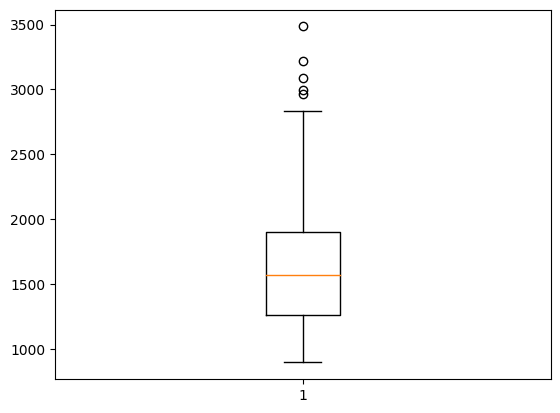

In [ ]:
cp = cp[cp['mrtijd'] > 500 ]
plt.boxplot(cp['mrtijd'])


In [ ]:
from scipy import stats
import numpy as np


D, p = stats.kstest(cp['mrpercentage'], "norm")  # Perform a one-sided Kolmogorov-Smirnov test
#print(cp['mrtijd'].corr(cp['umedia'], method= 'spearman'))

data = cp['uschermtijd']
data1 = cp['mrpercentage']
data2 = cp['mrtijd']
stat1, p1 = shapiro(data)
stat2, p2 = shapiro(data2)



alpha = 0.05
print(stat1,p1 )
if p > alpha:
    print(' schermtijd Sample looks Gaussian (fail to reject H0)')
else:
    print('schermtijd Sample does not look Gaussian (reject H0)')

if p1 > alpha:
    print('precentage Sample looks Gaussian (fail to reject H0)')
else:
    print('percentage Sample does not look Gaussian (reject H0)')

0.9165961146354675 7.300374272745103e-05
schermtijd Sample does not look Gaussian (reject H0)
percentage Sample does not look Gaussian (reject H0)


In [ ]:
stat, wil = wilcoxon(data, data1)
alpha = 0.05
if wil > alpha:
    print('There is no significant difference between the two datasets (fail to reject H0)')
else:
    print('There is a significant difference between the two datasets (reject H0)')

There is a significant difference between the two datasets (reject H0)


{'whiskers': [<matplotlib.lines.Line2D at 0x7dbb534fe3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7dbb534fe860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dbb534fe140>],
 'medians': [<matplotlib.lines.Line2D at 0x7dbb534fec80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dbb534fee60>],
 'means': []}

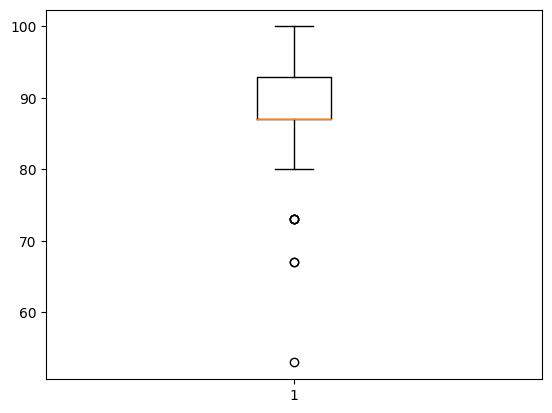

In [ ]:

plt.boxplot(cp['mrpercentage'])

In [ ]:
ding = cp["mrtijd"]
ding.mean(), ding.median(), ding.mode()[0], ding.std(), ding.var(axis=0)

(1642.1772151898733, 1568.0, 1700, 554.1245985843328, 307054.07075624797)

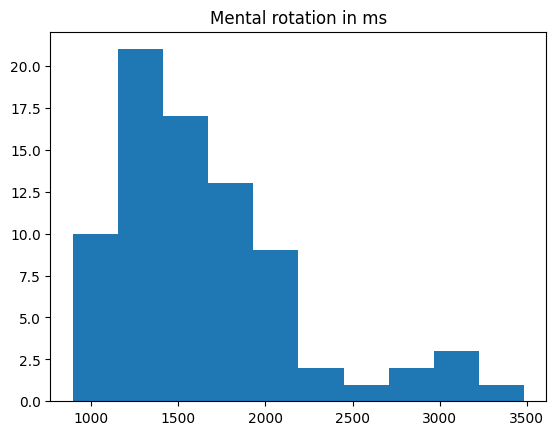

In [ ]:
plt.title('Mental rotation in ms')
plt.hist(ding)

plt.savefig('hist.png')

In [ ]:
from scipy.stats import spearmanr
cor, p_value = spearmanr(cp["uschermtijd"], cp["mrtijd"])
cor, p_value

(-0.09275661274737174, 0.4161877661577833)

In [ ]:
cor, p_value = spearmanr(cp["uschermtijd"], cp["mrpercentage"])
cor, p_value

(0.027455696191367653, 0.8101851723336216)

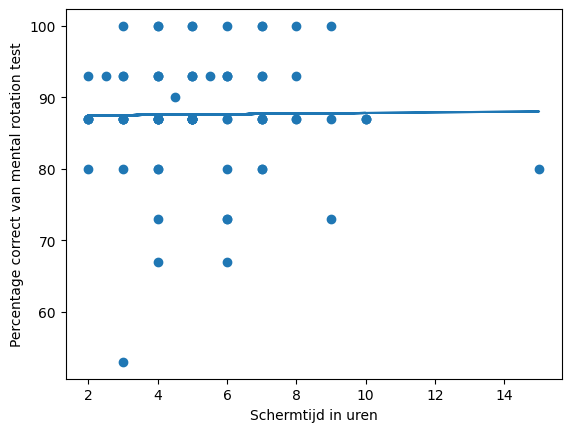

In [ ]:
#scatterplot 1
x = cp["uschermtijd"]
y = cp["mrpercentage"]
plt.scatter(x, y)
plt.xlabel('Schermtijd in uren')
plt.ylabel('Percentage correct van mental rotation test')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

In [ ]:
#scatterplot 2
x = cp2["uschermtijd"]
y = cp2["mrtijd"]
plt.scatter(x, y)
plt.xlabel('Schermtijd in uren')
plt.ylabel('Tijd gedaan over mental rotation test')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

NameError: name 'cp2' is not defined